# House Price Prediction using Pytorch


## 🎯 Project: House Price Prediction

This notebook predicts house prices using:

- Linear Regression
- Selected features:
  - SalePrice
  - LotArea
  - YearBuilt
  - 1stFlrSF, 2ndFlrSF

> 📁 Data from: `housePrice.csv`

In [239]:
import pandas as pd
import numpy as np

In [240]:
df = pd.read_csv('housePrice.csv')

In [241]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [242]:
df.shape

(1460, 81)

In [243]:
selected_features = [
    "SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
    "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"
]

df = df[selected_features].dropna()

In [244]:
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,YearBuilt,LotShape,1stFlrSF,2ndFlrSF
0,208500,60,RL,65.0,8450,Pave,2003,Reg,856,854
1,181500,20,RL,80.0,9600,Pave,1976,Reg,1262,0
2,223500,60,RL,68.0,11250,Pave,2001,IR1,920,866
3,140000,70,RL,60.0,9550,Pave,1915,IR1,961,756
4,250000,60,RL,84.0,14260,Pave,2000,IR1,1145,1053


In [245]:
df.shape

(1201, 10)

In [246]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name SalePrice and unique values are 597
Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name YearBuilt and unique values are 112
Column name LotShape and unique values are 4
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368


- From seeing the results we can say that the following are **categorical features**:

  1. `MSZoning`  
  2. `Street`  
  3. `LotShape`  
  4. `MSSubClass`

In [247]:
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,YearBuilt,LotShape,1stFlrSF,2ndFlrSF
0,208500,60,RL,65.0,8450,Pave,2003,Reg,856,854
1,181500,20,RL,80.0,9600,Pave,1976,Reg,1262,0
2,223500,60,RL,68.0,11250,Pave,2001,IR1,920,866
3,140000,70,RL,60.0,9550,Pave,1915,IR1,961,756
4,250000,60,RL,84.0,14260,Pave,2000,IR1,1145,1053


In [248]:
import datetime
datetime.datetime.now().year

2025

In [249]:
df['TotaYear'] = datetime.datetime.now().year - df['YearBuilt'] # using derived year

In [250]:
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,YearBuilt,LotShape,1stFlrSF,2ndFlrSF,TotaYear
0,208500,60,RL,65.0,8450,Pave,2003,Reg,856,854,22
1,181500,20,RL,80.0,9600,Pave,1976,Reg,1262,0,49
2,223500,60,RL,68.0,11250,Pave,2001,IR1,920,866,24
3,140000,70,RL,60.0,9550,Pave,1915,IR1,961,756,110
4,250000,60,RL,84.0,14260,Pave,2000,IR1,1145,1053,25


In [251]:
df.drop('YearBuilt',axis=1,inplace = True)

In [252]:
df.columns

Index(['SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', '1stFlrSF', '2ndFlrSF', 'TotaYear'],
      dtype='object')

In [253]:
cat_features = ['MSZoning','MSSubClass', 'LotShape', 'Street']
target_feature = 'SalePrice'

In [254]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85])

In [255]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store encoders (if you want to inverse transform later)
lbl_encoders = {}

# Encode each categorical feature
for col in cat_features:
    lbl_encoders[col] = LabelEncoder()
    df[col] = lbl_encoders[col].fit_transform(df[col])


In [256]:
lbl_encoders

{'MSZoning': LabelEncoder(),
 'MSSubClass': LabelEncoder(),
 'LotShape': LabelEncoder(),
 'Street': LabelEncoder()}

In [257]:
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,TotaYear
0,208500,5,3,65.0,8450,1,3,856,854,22
1,181500,0,3,80.0,9600,1,3,1262,0,49
2,223500,5,3,68.0,11250,1,0,920,866,24
3,140000,6,3,60.0,9550,1,0,961,756,110
4,250000,5,3,84.0,14260,1,0,1145,1053,25


In [258]:
## Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features
        

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]])

In [259]:
import torch
cat_features =torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [260]:
## creating continous variables
cont_features = []

for i in df.columns:
    if i in ['MSZoning','MSSubClass', 'LotShape', 'Street','SalePrice']:
        pass
    else:
        cont_features.append(i)   
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'TotaYear']

In [261]:
import torch
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [262]:
## Stacking continous varibles to tensors

# Stack continuous features into a NumPy array
cont_features_np = np.stack([df[i].values for i in cont_features], axis=1)

# Convert to PyTorch tensor
cont_values = torch.tensor(cont_features_np, dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [263]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [264]:
cat_features.shape , cont_values.shape, y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [265]:
df.shape

(1201, 10)

## Embedding Layer -> Only for Categorical Features

### Embedding size for categorical features

In [266]:
len(df['Street'].unique())

2

In [267]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [268]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]## Preprocessing Step
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [269]:

import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [270]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [271]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [272]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [273]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [274]:
embedding_val

[tensor([[ 1.1660, -1.3549, -2.7332,  ..., -0.1230, -0.0810,  0.5365],
         [-0.8374, -1.1147,  2.0691,  ...,  0.4295, -1.5378,  0.0605],
         [ 1.1660, -1.3549, -2.7332,  ..., -0.1230, -0.0810,  0.5365],
         ...,
         [-0.4665,  0.5241, -0.1294,  ...,  1.2565, -0.0202, -0.8404],
         [-0.8374, -1.1147,  2.0691,  ...,  0.4295, -1.5378,  0.0605],
         [-0.8374, -1.1147,  2.0691,  ...,  0.4295, -1.5378,  0.0605]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.3050, -0.4253,  1.6428],
         [ 0.3050, -0.4253,  1.6428],
         [ 0.3050, -0.4253,  1.6428],
         ...,
         [ 0.3050, -0.4253,  1.6428],
         [ 0.3050, -0.4253,  1.6428],
         [ 0.3050, -0.4253,  1.6428]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.2035],
         [-1.2035],
         [-1.2035],
         ...,
         [-1.2035],
         [-1.2035],
         [-1.2035]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.2679, -1.8858],
         [ 1.2679, -1.8858],
         [ 0.7138,  0.

In [275]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 1.1660, -1.3549, -2.7332,  ..., -1.2035,  1.2679, -1.8858],
        [-0.8374, -1.1147,  2.0691,  ..., -1.2035,  1.2679, -1.8858],
        [ 1.1660, -1.3549, -2.7332,  ..., -1.2035,  0.7138,  0.7056],
        ...,
        [-0.4665,  0.5241, -0.1294,  ..., -1.2035,  1.2679, -1.8858],
        [-0.8374, -1.1147,  2.0691,  ..., -1.2035,  1.2679, -1.8858],
        [-0.8374, -1.1147,  2.0691,  ..., -1.2035,  1.2679, -1.8858]],
       grad_fn=<CatBackward0>)

In [314]:
##Implement dropout
dropout = nn.Dropout(0.4)

In [316]:
final_embed = dropout(z)
final_embed

tensor([[ 0.3221,  0.0000, -0.0000,  ..., -0.8407, -0.0000,  0.2305],
        [ 2.9395, -0.0000,  0.0000,  ..., -0.0000, -2.5984,  0.2305],
        [ 0.3221,  0.0000, -0.2131,  ..., -0.0000, -2.5554, -0.0000],
        ...,
        [ 2.7215,  0.7795, -0.7970,  ..., -0.8407, -0.0000,  0.2305],
        [ 2.9395, -0.0000,  1.0345,  ..., -0.8407, -0.0000,  0.2305],
        [ 0.0000, -3.2300,  0.0000,  ..., -0.0000, -2.5984,  0.0000]],
       grad_fn=<MulBackward0>)

In [318]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [319]:
len(cont_features)

5

In [320]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [321]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Defining Loss

In [ ]:
loss_function = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [325]:
df.shape

(1201, 10)

In [326]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [327]:
cont_values.shape

torch.Size([1201, 5])

In [330]:

batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [329]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [331]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward() ## backpropagation
    optimizer.step()

Epoch number: 1 and the loss : 200496.765625
Epoch number: 11 and the loss : 200493.578125
Epoch number: 21 and the loss : 200489.125
Epoch number: 31 and the loss : 200482.546875
Epoch number: 41 and the loss : 200473.234375
Epoch number: 51 and the loss : 200462.140625
Epoch number: 61 and the loss : 200447.3125
Epoch number: 71 and the loss : 200429.125
Epoch number: 81 and the loss : 200409.15625
Epoch number: 91 and the loss : 200382.0625
Epoch number: 101 and the loss : 200354.703125
Epoch number: 111 and the loss : 200322.890625
Epoch number: 121 and the loss : 200290.25
Epoch number: 131 and the loss : 200254.09375
Epoch number: 141 and the loss : 200212.796875
Epoch number: 151 and the loss : 200162.34375
Epoch number: 161 and the loss : 200115.984375
Epoch number: 171 and the loss : 200057.453125
Epoch number: 181 and the loss : 200002.09375
Epoch number: 191 and the loss : 199942.359375
Epoch number: 201 and the loss : 199876.96875
Epoch number: 211 and the loss : 199808.312

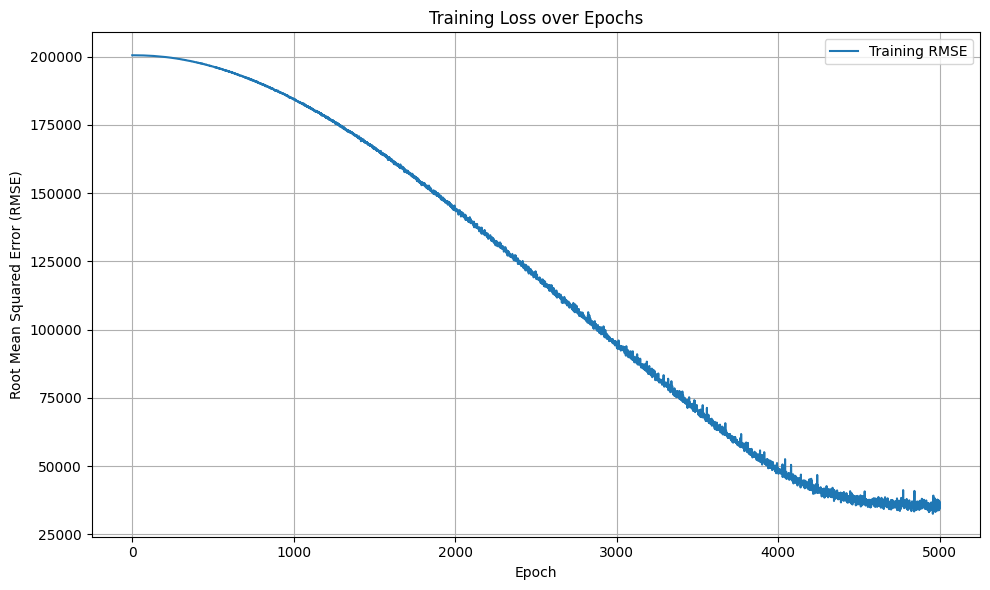

In [333]:
import matplotlib.pyplot as plt

# Convert final_losses (list of torch tensors) to float values
loss_values = [loss.item() for loss in final_losses]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_values, label='Training RMSE')
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [334]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 47005.4375


In [335]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [336]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [337]:
data_predicted

,Prediction
0,143283.453125
1,148778.406250
2,157739.640625
3,233264.203125
4,139610.343750
5,185511.265625
6,181914.937500
7,320513.406250
8,112200.203125
9,367674.343750


In [338]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,143283.453125,-13283.453125
1,138887.0,148778.406250,-9891.406250
2,175500.0,157739.640625,17760.359375
3,195000.0,233264.203125,-38264.203125
4,142500.0,139610.343750,2889.656250


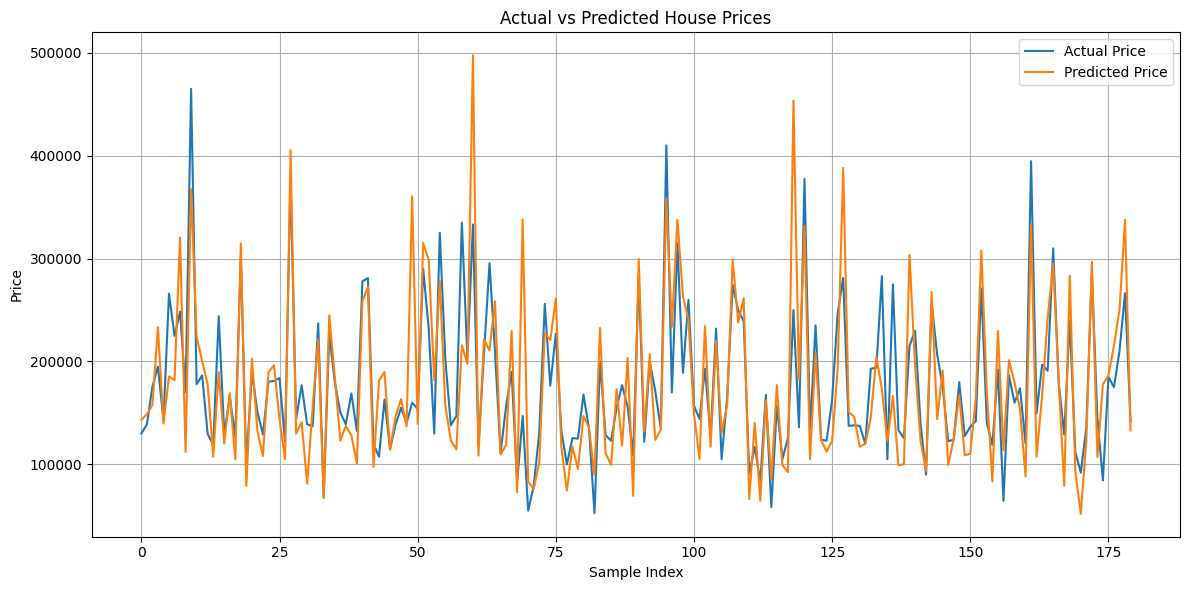

In [339]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(final_output['Test'].values, label='Actual Price')
plt.plot(final_output['Prediction'].values, label='Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


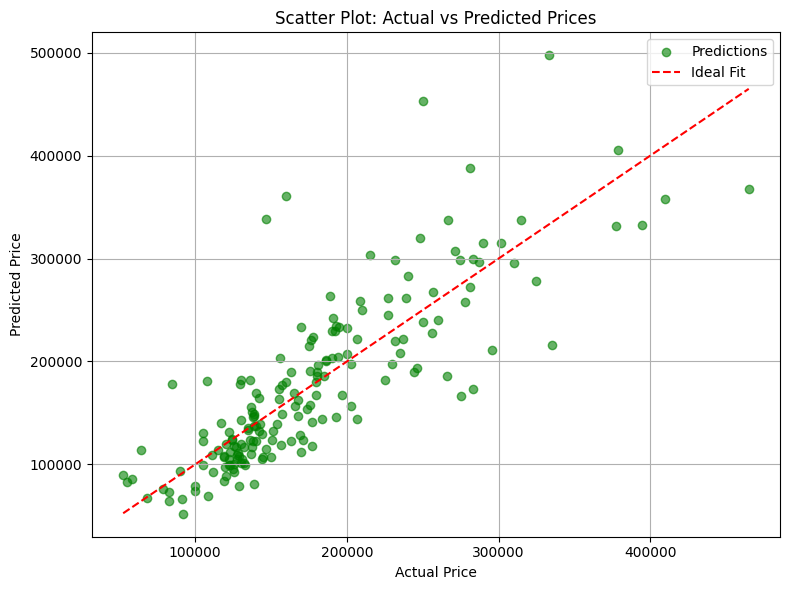

In [340]:
plt.figure(figsize=(8, 6))
plt.scatter(final_output['Test'], final_output['Prediction'], alpha=0.6, color='green', label='Predictions')
plt.plot([final_output['Test'].min(), final_output['Test'].max()],
         [final_output['Test'].min(), final_output['Test'].max()],
         'r--', label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot: Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


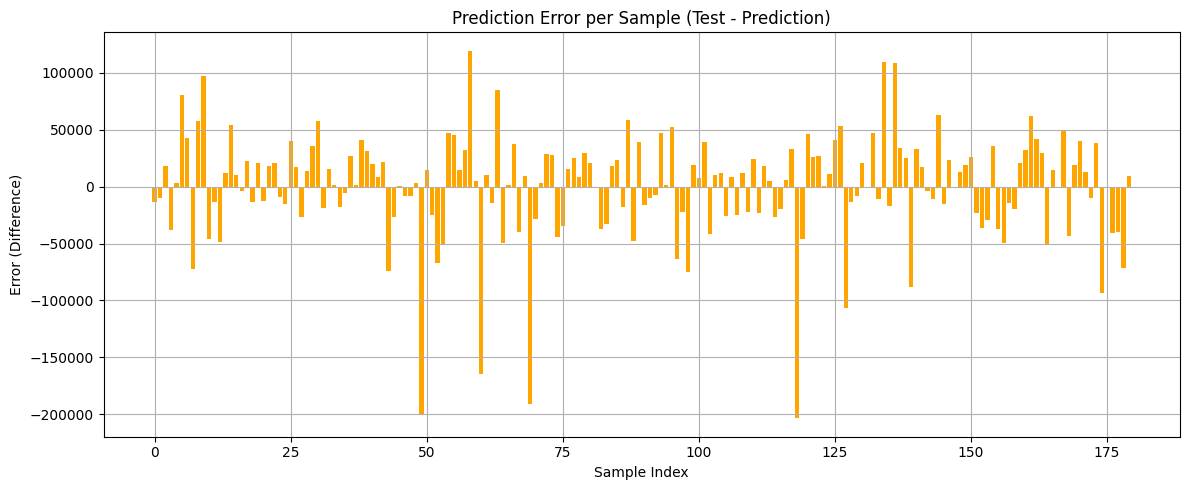

In [341]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(final_output)), final_output['Difference'], color='orange')
plt.title('Prediction Error per Sample (Test - Prediction)')
plt.xlabel('Sample Index')
plt.ylabel('Error (Difference)')
plt.tight_layout()
plt.grid(True)
plt.show()


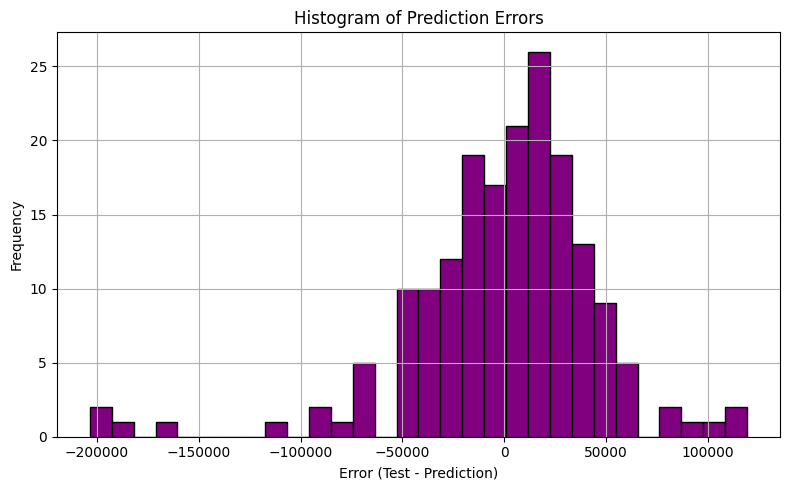

In [342]:
plt.figure(figsize=(8, 5))
plt.hist(final_output['Difference'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error (Test - Prediction)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [347]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Sklearn metrics from final_output DataFrame ---
mae = mean_absolute_error(final_output['Test'], final_output['Prediction'])
rmse = np.sqrt(mean_squared_error(final_output['Test'], final_output['Prediction']))
r2 = r2_score(final_output['Test'], final_output['Prediction'])

# --- PyTorch final training RMSE from last epoch ---
final_train_rmse = final_losses[-1].item()

# === Print everything together ===
print("📊 Model Performance Metrics")
print("-" * 40)
print(f"🔧 Final Training RMSE (PyTorch): {final_train_rmse:.4f}")
print(f"🧪 Test RMSE                    : {rmse:.2f}")
print(f"📉 Mean Absolute Error (MAE)    : {mae:.2f}")
print(f"📈 R² Score                     : {r2:.4f}")




📊 Model Performance Metrics
----------------------------------------
🔧 Final Training RMSE (PyTorch): 34546.2852
🧪 Test RMSE                    : 47005.44
📉 Mean Absolute Error (MAE)    : 33072.13
📈 R² Score                     : 0.5669


In [348]:
##Saving the model
torch.save(model,'HousePrice.pt')

In [349]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [351]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [352]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [353]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)